## Importing Required Libraries

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


## Data Loading and Preprocessing

In [3]:

file_path = 'C:\\Users\\amnak\\Downloads\\archive (5)\\Churn_Modelling.csv'
data = pd.read_csv(file_path)
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# categorical variables
label_encoder_geography = LabelEncoder()
label_encoder_gender = LabelEncoder()

data['Geography'] = label_encoder_geography.fit_transform(data['Geography'])
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='median')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])


## Feature Engineering

In [7]:
data['BalanceSalaryRatio'] = data['Balance'] / (data['EstimatedSalary'] + 1)
data['TenureByAge'] = data['Tenure'] / (data['Age'] + 1)
data['CreditScoreAgeRatio'] = data['CreditScore'] / (data['Age'] + 1)

# Remove outliers
def remove_outliers(df, column, threshold=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_scores = (df[column] - mean) / std
    return df[np.abs(z_scores) < threshold]

for column in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    data = remove_outliers(data, column)

## Feature Scaling


In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Exited', axis=1))
X = pd.DataFrame(scaled_features, columns=data.drop('Exited', axis=1).columns)
y = data['Exited']

# imbalanced classes 
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


## logestic Regression

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71      1561
         1.0       0.71      0.70      0.71      1557

    accuracy                           0.71      3118
   macro avg       0.71      0.71      0.71      3118
weighted avg       0.71      0.71      0.71      3118

Accuracy: 0.709108402822322



## Random Forest

In [12]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_random_forest))
print(f"Accuracy: {accuracy_score(y_test, y_pred_random_forest)}\n")


Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1561
         1.0       0.90      0.89      0.90      1557

    accuracy                           0.90      3118
   macro avg       0.90      0.90      0.90      3118
weighted avg       0.90      0.90      0.90      3118

Accuracy: 0.899615137908916



## Gradient Boasting

In [15]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gradient_boosting))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gradient_boosting)}\n")


Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1561
         1.0       0.88      0.85      0.86      1557

    accuracy                           0.87      3118
   macro avg       0.87      0.87      0.87      3118
weighted avg       0.87      0.87      0.87      3118

Accuracy: 0.8656189865298268



## Visualizing the Results

Logistic Regression:


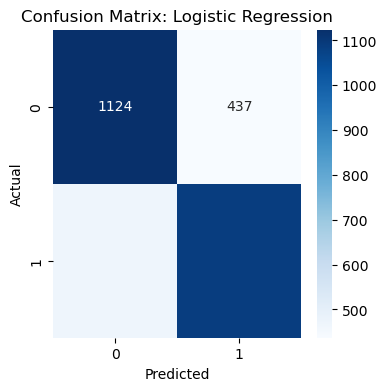

<Figure size 200x200 with 0 Axes>

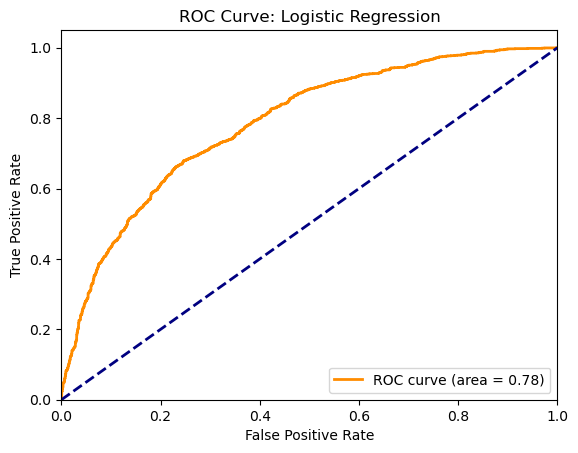

<Figure size 200x200 with 0 Axes>

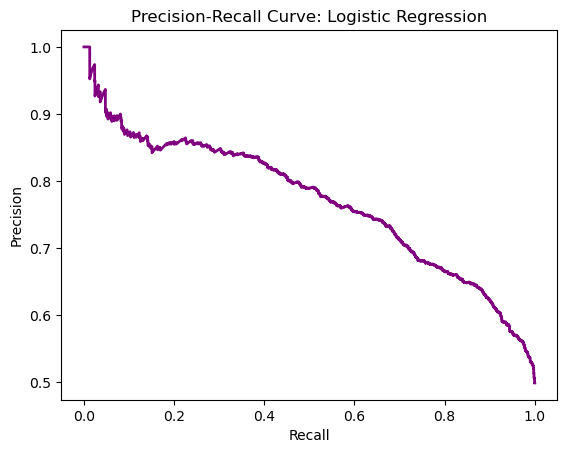

In [37]:

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    plt.figure(figsize=(2, 2))
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(y_true, y_pred_proba, title):
    plt.figure(figsize=(2, 2))
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, color='purple', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()
    
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression:")
plot_confusion_matrix(y_test, y_pred_log_reg, 'Confusion Matrix: Logistic Regression')
plot_roc_curve(y_test, y_pred_log_reg_proba, 'ROC Curve: Logistic Regression')
plot_precision_recall_curve(y_test, y_pred_log_reg_proba, 'Precision-Recall Curve: Logistic Regression')


Random Forest:


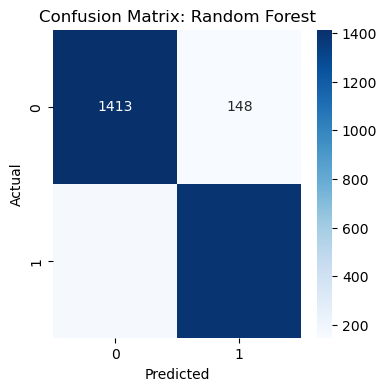

<Figure size 200x200 with 0 Axes>

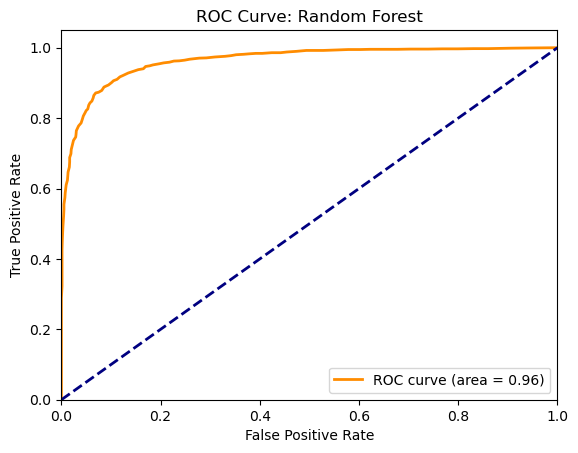

<Figure size 200x200 with 0 Axes>

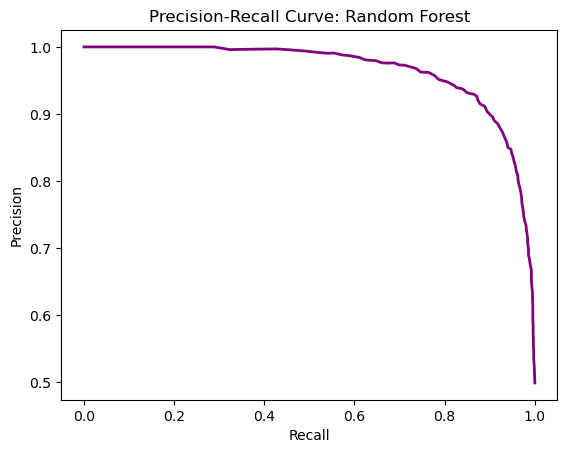

In [38]:
y_pred_random_forest_proba = random_forest.predict_proba(X_test)[:, 1]
print("Random Forest:")
plot_confusion_matrix(y_test, y_pred_random_forest, 'Confusion Matrix: Random Forest')
plot_roc_curve(y_test, y_pred_random_forest_proba, 'ROC Curve: Random Forest')
plot_precision_recall_curve(y_test, y_pred_random_forest_proba, 'Precision-Recall Curve: Random Forest')


Gradient Boosting:


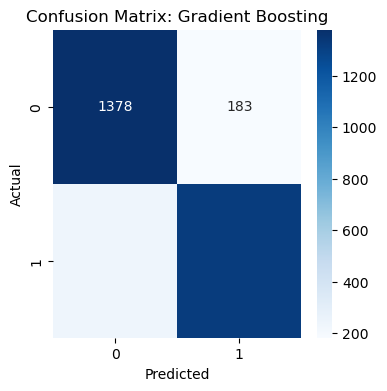

<Figure size 200x200 with 0 Axes>

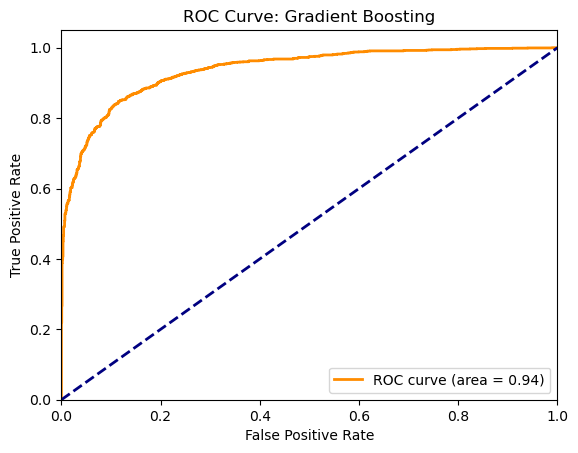

<Figure size 200x200 with 0 Axes>

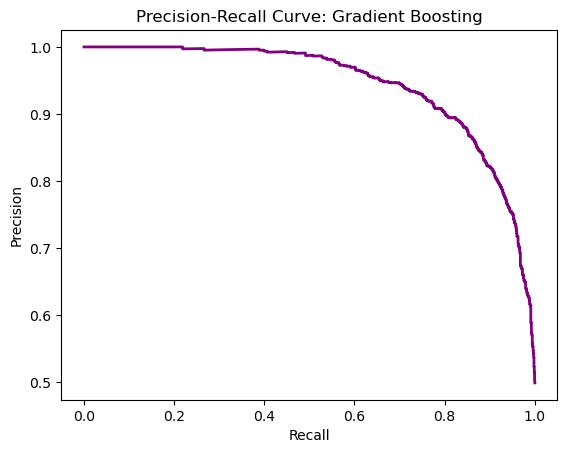

In [39]:
y_pred_gradient_boosting_proba = gradient_boosting.predict_proba(X_test)[:, 1]
print("Gradient Boosting:")
plot_confusion_matrix(y_test, y_pred_gradient_boosting, 'Confusion Matrix: Gradient Boosting')
plot_roc_curve(y_test, y_pred_gradient_boosting_proba, 'ROC Curve: Gradient Boosting')
plot_precision_recall_curve(y_test, y_pred_gradient_boosting_proba, 'Precision-Recall Curve: Gradient Boosting')


C:\Users\amnak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


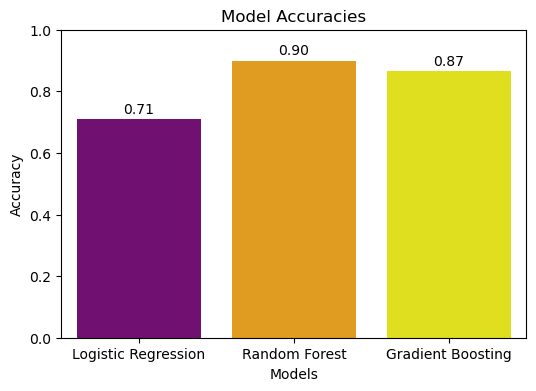

In [45]:
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test)),
    accuracy_score(y_test, random_forest.predict(X_test)),
    accuracy_score(y_test, gradient_boosting.predict(X_test))
]
colors = ['purple', 'orange', 'yellow'] 

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies,palette=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
for i in range(len(model_names)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.2f}', ha='center')
plt.show()